# Data Visualization
EDA: exploratory data analysis
* Compute summary stats
* Generate data visualizations

## Goals of Data Visualization
1. Clearly and accurately represent data
1. Be creative, with the goal of increasing readability
1. Label the units and points of interest

## Some Jargon
Chart: 2D visualization
* Plot: chart of data points (e.g. scatter plot)
* Graph: chart of math function (e.g. sine curve)

## Ways to use Matplotlib
1. Use the pyplot module: like a state machine where there is a "current figure"
1. Use the OOP interface: maintain object references
1. Mix of the two

## Line Charts

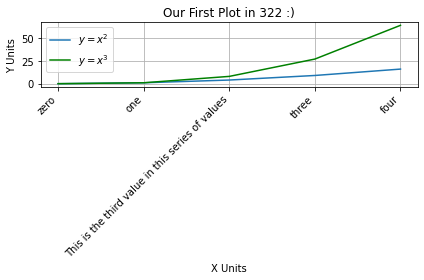

In [1]:
import matplotlib.pyplot as plt

def line_chart_example(x, y, y3):
    plt.figure() # new figure
    plt.plot(x, y, label="$y=x^2$")
    # task: add another line to our figure for y = x^3
    plt.plot(x, y3, c="green", label="$y=x^3$")
    plt.legend()
    
    # add some labels
    plt.title("Our First Plot in 322 :)")
    plt.xlabel("X Units")
    plt.ylabel("Y Units")
    plt.grid(True)
    
    # customize the x tick labels
    xtick_labels = ["zero", "one", "This is the third value in this series of values", "three", "four"]
    plt.xticks(x, xtick_labels, rotation=45, horizontalalignment="right") # locations, labels
    
    # show the plot
    plt.tight_layout()
    plt.savefig("line_chart.pdf")
    plt.show()
    
# we need data
x = list(range(5))
y = [value ** 2 for value in x]
y3 = [value ** 3 for value in x]

line_chart_example(x, y, y3)

## Bar Charts

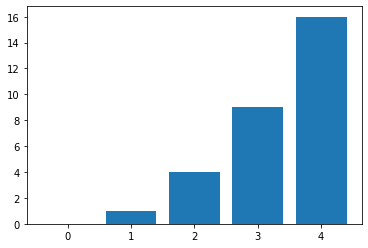

In [2]:
def bar_chart_example(x, y):
    plt.figure()
    plt.bar(x, y)
    plt.show()
    
bar_chart_example(x, y)

## Pie Charts

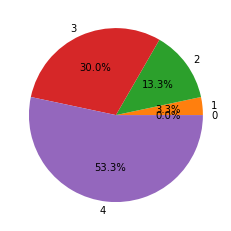

In [3]:
def pie_chart_example(x, y):
    plt.figure()
    plt.pie(y, labels=x, autopct="%1.1f%%")
    plt.show()
    
pie_chart_example(x, y)

## Task
Create a bar and a pie chart for the model year counts we computed with `get_frequencies()`

In [4]:
import utils
# to programmatically force a reload of a module:
import importlib 
importlib.reload(utils)

<module 'utils' from '/home/U3-Data-Analysis/JupyterNotebookFunS1/utils.py'>

In [5]:
utils.dummy_function1()
utils.dummy_function2()

[75, 76, 77]
[2, 2, 1]


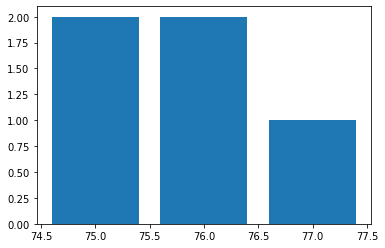

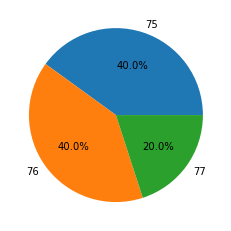

In [6]:
header = ["CarName", "ModelYear", "MSRP"]
msrp_table = [["ford pinto", 75, 2769],
            ["toyota corolla", 75, 2711],
            ["ford pinto", 76, 3025],
            ["toyota corolla", 77, 2789],
            ["honda accord", 76, 3999]]

modelyear_values, modelyear_counts = utils.get_frequencies(msrp_table, header, "ModelYear")
print(modelyear_values)
print(modelyear_counts)

# warm up
bar_chart_example(modelyear_values, modelyear_counts)
pie_chart_example(modelyear_values, modelyear_counts)

## Histograms

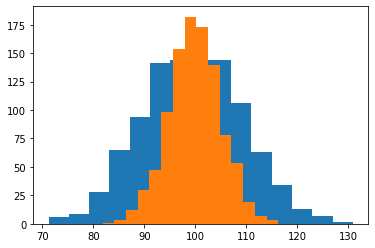

In [7]:
def histogram_example(data, data2):
    # data is a 1D list of values
    plt.figure() 
    plt.hist(data, bins=15) # bins=10    
    plt.hist(data2, bins=15) # bins=10

    plt.show() 

# let's create a histogram of some normal data to see the "bell-shaped curve"
import numpy as np 
mean = 100 # mu
stdev = 10 # sigma
num_samples = 1000 # n
normal_data = np.random.normal(mean, stdev, num_samples)
normal_data2 = np.random.normal(mean, stdev / 2, num_samples)
histogram_example(normal_data, normal_data2)

# task: add another histogram to the same figure
# for mean=100, stdev=5
# prediction: bell shaped curve going to be narrower or wider?

## Box Plots

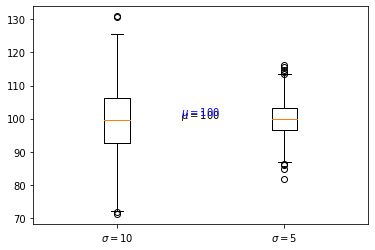

In [8]:
def box_plot_example(distributions, labels):
    # distributions: a list of 1D lists of data values
    plt.figure()
    plt.boxplot(distributions)
    # boxes correspond to the 1st and 3rd quartiles
    # the line in the middle of the box is the 2nd quartile (AKA median)
    # the whiskers correspond to +/- 1.5 * IQR
    # IQR: interquratile range (3rd quartile - 1st quartile)
    # circles outside of the whiskers are outliers

    # task: replace the x tick labels with labels identifying the
    # boxes e.g. sigma=10 and sigma=5
    plt.xticks(list(range(1, len(labels) + 1)), labels)

    # annotations
    # let's add a label for mu=100 in the center of the figure
    # xycoords="data": default, specify the annotation location in the same
    # coordinates as your data values
    # xycoords="axes fraction": specify the annotation location in
    # absolute coordinates for the axes: (0,0) is bottom left
    # (1, 1) is upper right)
    plt.annotate("$\mu=100$", xy=(1.5, 100), xycoords="data", 
        horizontalalignment="center")
    plt.annotate("$\mu=100$", xy=(0.5, 0.5), xycoords="axes fraction", 
        horizontalalignment="center", color="blue")
    plt.show()

# let's create a box plot for the same data we created histograms for
box_plot_example([normal_data, normal_data2], ["$\sigma=10$", "$\sigma=5$"])

## Task
Create a box plot to show MSRPs grouped by ModelYear
* x-axis: "categorical" attribute ModelYear e.g. 75, 76, 77
* y-axis: "continuous" attribute the distribution of MSRPs
* To do this, we should write a general utility function: `group_by(table, header, group_by_col_name)` and returns parallel lists: list of unique group names and a list of the sub tables for each group

[75, 76, 77]
[[['ford pinto', 75, 2769], ['toyota corolla', 75, 2711]], [['ford pinto', 76, 3025], ['honda accord', 76, 3999]], [['toyota corolla', 77, 2789]]]
[[2769, 2711], [3025, 3999], [2789]]


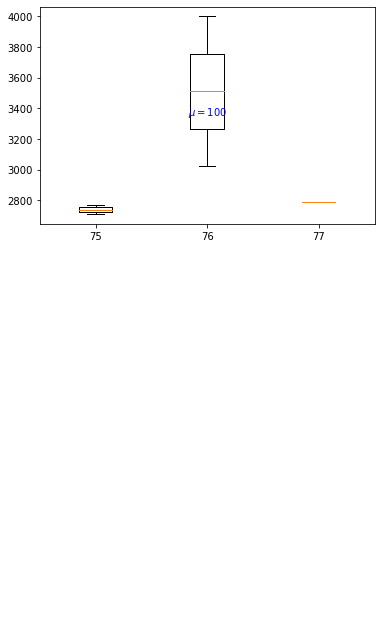

In [9]:
importlib.reload(utils)
modelyear_names, modelyear_subtables = utils.group_by(msrp_table, header, "ModelYear")
print(modelyear_names)
print(modelyear_subtables)
# extract the MSRPs from each subtable
msrp_dists = [utils.get_column(subtable, header, "MSRP") for subtable in modelyear_subtables]
print(msrp_dists)
box_plot_example(msrp_dists, modelyear_names)

## Discretization
Converting a numeric (continuous) attribute to be discrete (categorical)
* We will implement equal widths binning (same as `plt.hist()`)
* There are N bins 
* Multiple ways to define the bins 
* Use N + 1 cutoffs (because `np.histogram()` and `plt.hist()` use N + 1 cutoffs)
* All bins are half open (except the last)
* The first and last cutoff are the min and max respectively

[9, 12, 21, 36, 39, 44, 46, 47, 58, 64, 65, 67, 67, 70, 83, 87, 87, 88, 88, 88]
[9.0, 24.8, 40.6, 56.4, 72.2, 88]
[ 9.  24.8 40.6 56.4 72.2 88. ]


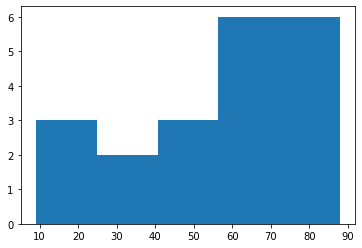

In [10]:
importlib.reload(utils)
np.random.seed(0)
values = sorted(list(np.random.choice(100, 20))) # 20 values in [0, 100)
# sampling with replacement
print(values)
cutoffs = utils.compute_equal_width_cutoffs(values, 5)
print(cutoffs)
# how do we know if we are right?
# let's use matplotlib to get the cutoffs to check ours against
plt_freqs, plt_cutoffs, plt_artists = plt.hist(values, bins=5)
print(plt_cutoffs)
# use the assert statement in order to "assert" that two values or two expressions are the same (or really close...)
#assert True == False 
# when an assert evals to True... program execution continues
# when an assert evals to False... program execution stops
# order... actual , expected (solution)
assert np.allclose(cutoffs, plt_cutoffs)

## Task: Finish the Discretization Lab
1. Given a list of values and the number of equal-width bins to create (N), write a function to return a list of the N + 1 cutoff points.
1. Given a list of values and a list of N + 1 cutoff points, write a function to return the corresponding frequencies of the N bins.
    * `[9.0, 24.8) [24.8, 40.6) [40.6, 56.4) [56.4, 72.2) [72.2, 88]`
1. Given a list of the N bins and the N frequencies of the bins, write a function to produce a histogram that matches that produced with the same data by plt.hist()
    * `plt.bar()` documentation: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.bar.html

[3, 2, 3, 6, 6]
[3. 2. 3. 6. 6.]


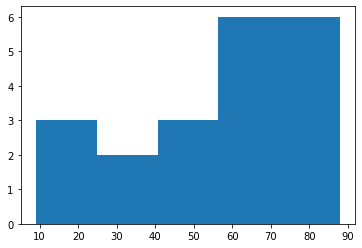

In [11]:
# task 2
freqs = utils.compute_bin_frequencies(values, cutoffs)
print(freqs)
print(plt_freqs)
assert list(freqs) == list(plt_freqs)

# task 3
plt.figure()
plt.bar(cutoffs[:-1], freqs, width=cutoffs[1] - cutoffs[0], align="edge"); # ; to suppress output

## Linear Regression
* Suppose we have data, x and y, where x is the indepedent variable and y is the dependent variable
* We will cover "simple" linear regression (univariate; one independent variable)
* y = mx + b 
* For the least squares approach
    * The line has to pass through (mean x, mean y)
    * Compute the slope (m), we can solve for b 
$$m = \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})^2}$$


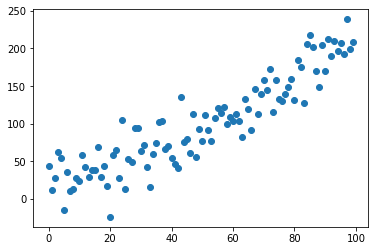

In [12]:
np.random.seed(0)
# we need data... lets do y = 2x + some noise
x = list(range(0, 100))
y = [value * 2 + np.random.normal(0, 25) for value in x]
plt.scatter(x, y)

In [15]:
importlib.reload(utils)
m, b = utils.compute_slope_intercept(x, y)
print("m:", m, "b:", b)
# check our work against scipy
import scipy.stats as stats 
sp_m, sp_b, sp_r, sp_r_p_val, sp_std_err = stats.linregress(x, y)
assert np.isclose(m, sp_m)
assert np.isclose(b, sp_b)



m: 1.924917458430444 b: 5.211786196055144
